# Handwritten digits recognition (using Multilayer Perceptron)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on GitHub
> - ▶️ Demo: [try this model in action](https://trekhleb.github.io/machine-learning-experiments)

In this experiment we will build a [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

A **multilayer perceptron** (MLP) is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

### Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Tensorflow version: 2.0.0
Keras version: 2.2.4-tf


### Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`. The **test** dataset consists of 10000 images.

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [3]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


### Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [4]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows: 

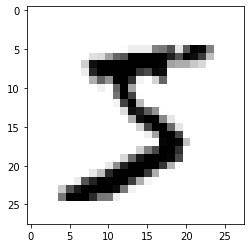

In [5]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

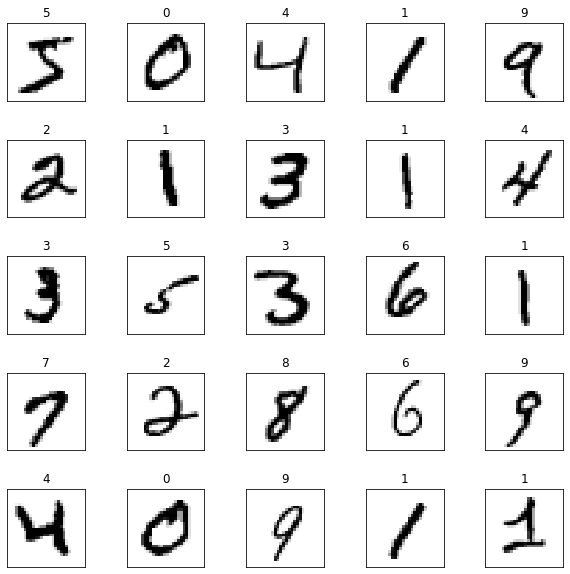

In [6]:
# How many numbers to display.
numbers_to_display = 25

# Calculate the number of cells that will hold all the numbers.
num_cells = math.ceil(math.sqrt(numbers_to_display))

# Make the plot a little bit bigger than default one.
plt.figure(figsize=(10, 10))

# Go through the first numbers in a training set and plot them.
for plot_index in range(numbers_to_display):
    # Extract digit data.
    digit_label = y_train[plot_index]
    digit_pixels = x_train[plot_index]

    # Calculate image size (remember that each picture has square proportions).
    image_size = int(math.sqrt(digit_pixels.shape[0]))
    
    # Plot the number matrix.
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(digit_pixels, cmap=plt.cm.binary)
    plt.title(digit_label)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Plot all subplots.
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Let's see how the digits look like after normalization. We're expecting it to look similar to original.

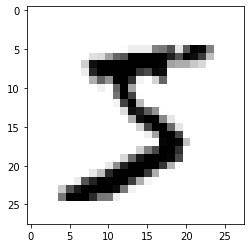

In [9]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

### Build the model

We will use [sequential Keras model](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) with 4 layers:

- Layer 1: **Flatten** layer that will flatten image 2D matrix into 1D vector.
- Layer 2: **Input** layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Hidden** layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...   

In [10]:
# Input layers.
layer1 = tf.keras.layers.Flatten(input_shape=x_train.shape[1:])

layer2 = tf.keras.layers.Dense(
    128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
)

# Hidden layers.
layer3 = tf.keras.layers.Dense(
    128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
)

# Output layers.
layer4 = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)

# Combine layers together throuhg sequential model.
model = tf.keras.models.Sequential([layer1, layer2, layer3, layer4])

Here is our model summary so far.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [12]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

### Train the model

In [13]:
training_history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.5210 - accuracy: 0.9225 - val_loss: 0.3350 - val_accuracy: 0.9508
Epoch 2/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3014 - accuracy: 0.9535 - val_loss: 0.2574 - val_accuracy: 0.9647
Epoch 3/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2635 - accuracy: 0.9593 - val_loss: 0.2389 - val_accuracy: 0.9612
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2416 - accuracy: 0.9624 - val_loss: 0.2339 - val_accuracy: 0.9644
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2254 - accuracy: 0.9647 - val_loss: 0.2134 - val_accuracy: 0.9680
Epoch 6/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2139 - accuracy: 0.9668 - val_loss: 0.2027 - val_accuracy: 0.9691
Epoch 7/10
60000/60000 [===========================

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

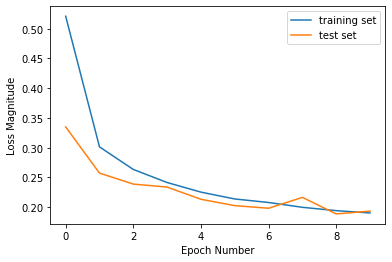

In [14]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

### Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

#### Training set accuracy

In [15]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train, y_train)

In [16]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.17496898963451385
Training accuracy:  0.97513336


#### Test set accuracy

In [17]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)

In [18]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.1934513657450676
Validation accuracy:  0.9679


### Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model shuold be saved to HDF5.

In [19]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [20]:
loaded_model = tf.keras.models.load_model(model_name)

### Use the model (do predictions)

In [21]:
predictions = loaded_model.predict([x_test])

In [22]:
print('predictions:', predictions.shape)

predictions: (10000, 10)


In [23]:
pd.DataFrame(predictions)

,0,1,2,3,4,5,6,7,8,9
0,8.071730e-06,1.545903e-05,3.733762e-04,7.173644e-04,5.141210e-08,2.541265e-05,9.735403e-09,9.987930e-01,3.828806e-05,2.892920e-05
1,2.013848e-03,1.080580e-03,9.695460e-01,1.209490e-02,4.666214e-08,1.145304e-04,4.304573e-03,2.563797e-06,1.084287e-02,2.111004e-08
2,1.720688e-04,9.687250e-01,6.323793e-03,8.126554e-04,6.793449e-04,3.875291e-04,3.773541e-03,1.182572e-02,7.245074e-03,5.524388e-05
3,9.921094e-01,2.927716e-06,3.392041e-04,1.037912e-04,9.301818e-05,4.552331e-04,6.590629e-03,5.292683e-05,1.540185e-05,2.375230e-04
4,6.762440e-05,5.072895e-06,1.586207e-05,8.821634e-07,9.938306e-01,1.542113e-05,1.073123e-04,1.572256e-04,1.300525e-05,5.786868e-03
...,...,...,...,...,...,...,...,...,...,...
9995,3.144567e-07,1.510507e-04,9.996512e-01,1.361651e-04,1.097234e-12,2.434351e-09,9.730062e-09,1.425561e-05,4.698793e-05,2.890553e-10
9996,4.100153e-07,3.327625e-04,1.313395e-04,9.988753e-01,3.337146e-08,1.960033e-04,2.860390e-09,2.908445e-05,1.285792e-04,3.063577e-04
9997,1.200739e-08,4.875526e-05,2.287363e-09,3.236028e-08,9.998285e-01,3.935526e-08,8.184806e-08,6.531378e-05,3.941269e-06,5.331949e-05
9998,9.670173e-04,7.845441e-07,4.517103e-06,1.049535e-03,1.221907e-07,9.966463e-01,9.422892e-04,6.645021e-06,3.806089e-04,2.108291e-06


In [24]:
print(np.argmax(predictions[0]))

7


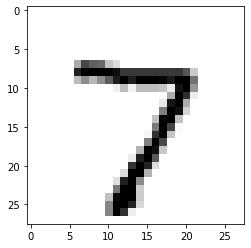

In [25]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

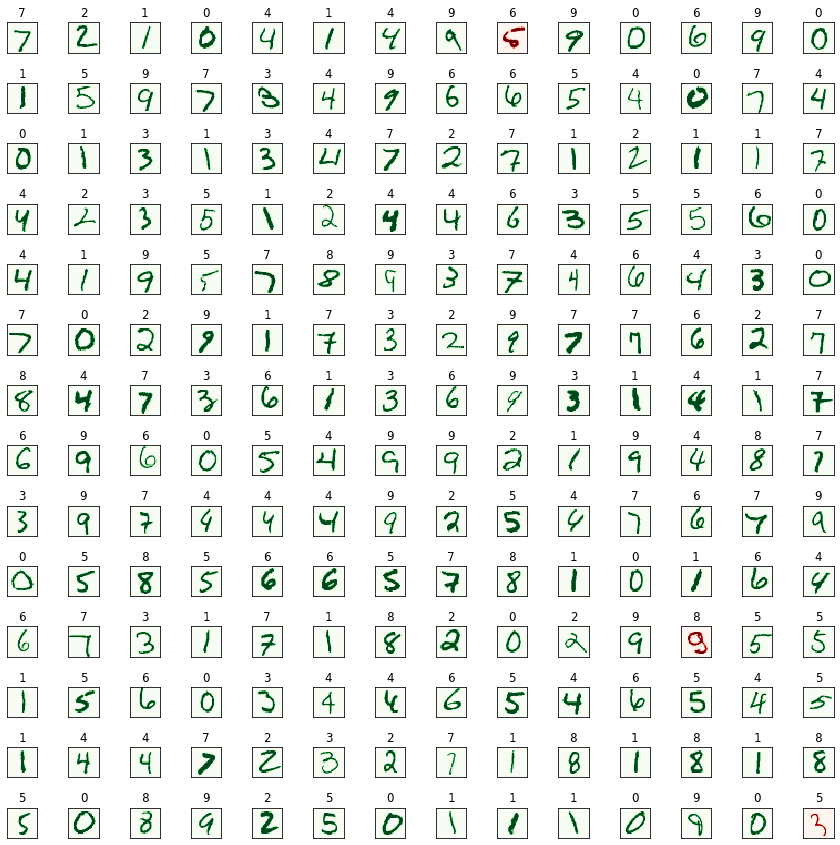

In [26]:
# How many numbers to display.
numbers_to_display = 196

# Calculate the number of cells that will hold all the numbers.
num_cells = math.ceil(math.sqrt(numbers_to_display))

# Make the plot a little bit bigger than default one.
plt.figure(figsize=(15, 15))

# Go through the first numbers in a test set and plot them.
for plot_index in range(numbers_to_display):
    # Extract digit data.
    digit_label = y_test[plot_index]
    digit_pixels = x_test[plot_index]
    
    # Predicted label.
    predicted_label = np.argmax(predictions[plot_index])
    
    # Plot the number matrix.
    color_map = 'Greens' if predicted_label == digit_label else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(digit_pixels, cmap=color_map)
    plt.title(predicted_label)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Plot all subplots.
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()